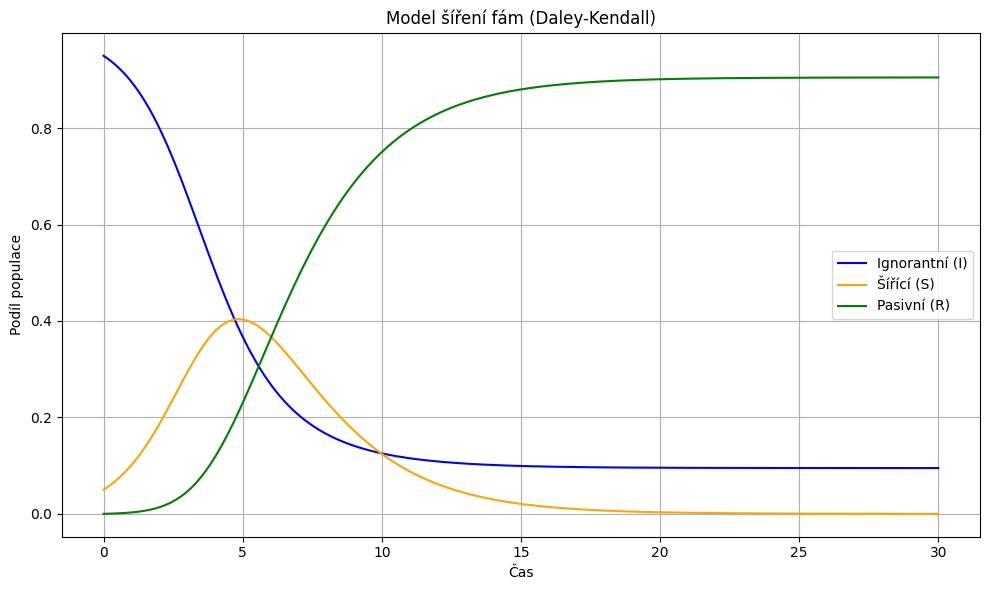

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


# --- 1. Definice modelu ---
# y = [motivace M, únava F]
def mental_fatigue_model(y, t, a, b, r, s):
    M, F = y
    dM_dt = -a * F + r * (1 - M)  # M klesá s únavou, roste při odpočinku
    dF_dt = b * M - s * F  # F roste při aktivitě, klesá odpočinkem
    return [dM_dt, dF_dt]


# --- 2. Počáteční podmínky ---
M0 = 1.0  # plná motivace
F0 = 0.0  # žádná únava
y0 = [M0, F0]

# Parametry
a = 1.2  # vliv únavy na motivaci
b = 1.0  # vliv práce na únavu
r = 0.4  # zotavení motivace
s = 0.5  # zotavení z únavy

# Časový rozsah
t = np.linspace(0, 20, 500)

# --- 3. Řešení ODE ---
solution = odeint(mental_fatigue_model, y0, t, args=(a, b, r, s))
M, F = solution.T

# --- 4. Vizualizace ---
plt.figure(figsize=(10, 6))
plt.plot(t, M, label="Motivace (M)", color="teal")
plt.plot(t, F, label="Únava (F)", color="crimson")
plt.xlabel("Čas")
plt.ylabel("Stav")
plt.title("Model duševní únavy při studiu")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
